In [1]:
import pandas as pd

class_info_df = pd.read_csv('data/class_info.csv')
class_info_df.head()

,class name,English_name,Scientific_name,type
0,Aegcau_call,Long-tailed Tit,Aegithalos caudatus,bird
1,Alaarv_song,Eurasian Skylark,Alauda arvensis,bird
2,Anttri_song,Tree Pipit,Anthus trivialis,bird
3,Butbut_call,Common Buzzard,Buteo buteo,bird
4,Carcan_call,Common Linnet,Linaria cannabina,bird


In [2]:
sample_df = pd.read_csv('data/sample.csv')
sample_df.head()

,filename,Aegcau_call,Alaarv_song,Anttri_song,Butbut_call,Carcan_call,Carcan_song,Carcar_call,Carcar_song,Cerbra_call,...,Sylund_call,Sylund_song,Tetpyg_song,Tibtom_song,Trotro_song,Turmer_call,Turmer_song,Turphi_call,Turphi_song,Unknown
0,nips4b_test001.wav,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,nips4b_test002.wav,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,nips4b_test003.wav,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,nips4b_test004.wav,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,nips4b_test005.wav,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,filename,start,end,class
0,nips4b_train001.wav,2.975057,3.172426,Petpet_song
1,nips4b_train001.wav,1.967891,2.054966,Sylcan_song
2,nips4b_train001.wav,0.856236,0.937506,Sylcan_song
3,nips4b_train001.wav,1.541224,1.674739,Sylcan_song
4,nips4b_train001.wav,1.843084,1.973696,Sylcan_song


In [4]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,filename
0,nips4b_test001.wav
1,nips4b_test002.wav
2,nips4b_test003.wav
3,nips4b_test004.wav
4,nips4b_test005.wav


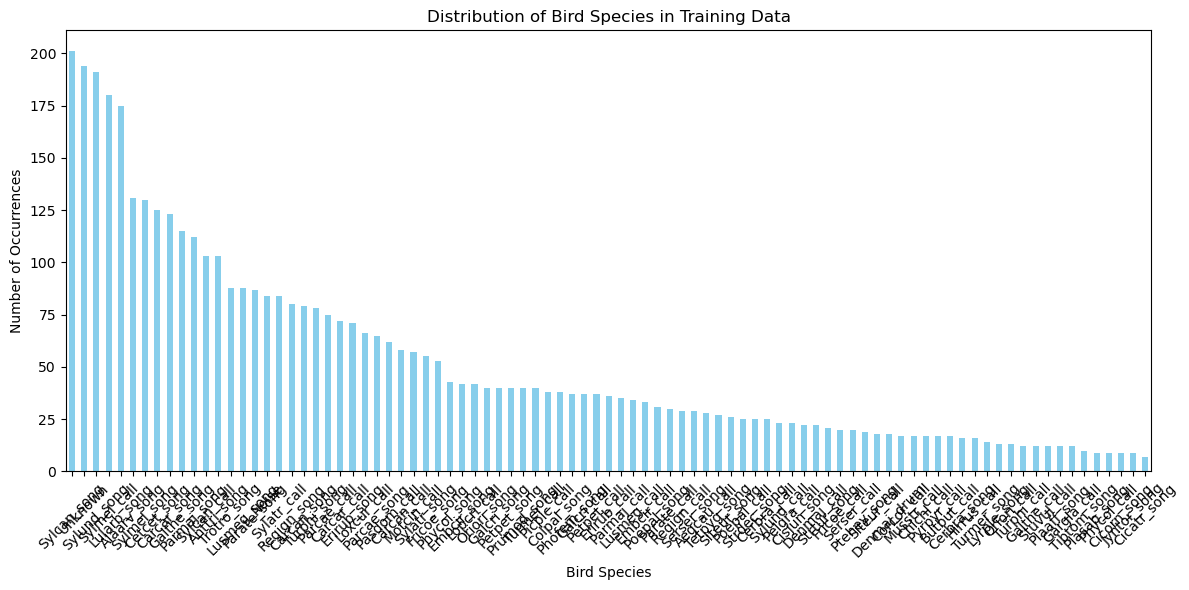

In [5]:
import matplotlib.pyplot as plt

# Visualizing the distribution of bird species in the training data
class_distribution = train_df['class'].value_counts()

plt.figure(figsize=(12, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bird Species in Training Data')
plt.xlabel('Bird Species')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(525, 89)

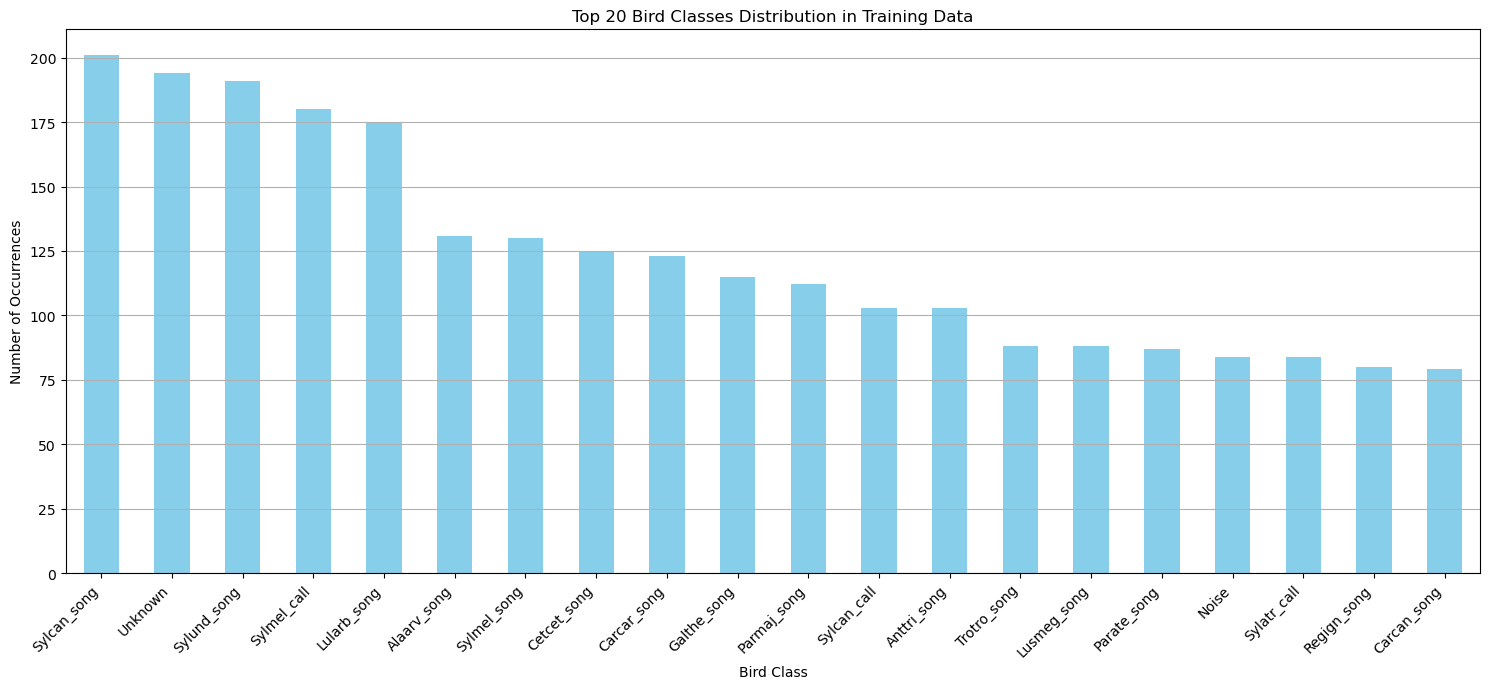

In [6]:
# Number of unique audio files in the training set
unique_audio_files = train_df['filename'].nunique()

# Number of unique bird classes
unique_bird_classes = train_df['class'].nunique()

# Distribution of bird classes
bird_class_distribution = train_df['class'].value_counts()

# Plotting the distribution of bird classes
plt.figure(figsize=(15, 7))
bird_class_distribution.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Bird Classes Distribution in Training Data')
plt.xlabel('Bird Class')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')

unique_audio_files, unique_bird_classes


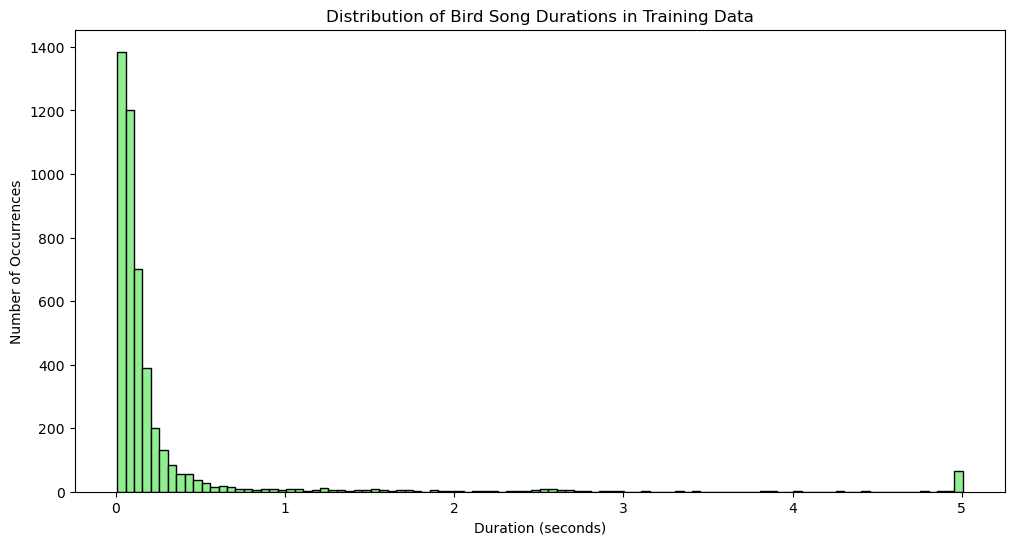

In [7]:
# Calculate the duration of bird songs
train_df['duration'] = train_df['end'] - train_df['start']

# Plotting the distribution of song durations
plt.figure(figsize=(12, 6))
train_df['duration'].hist(bins=100, color='lightgreen', edgecolor='black')
plt.title('Distribution of Bird Song Durations in Training Data')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Occurrences')
plt.grid(False)
plt.show()


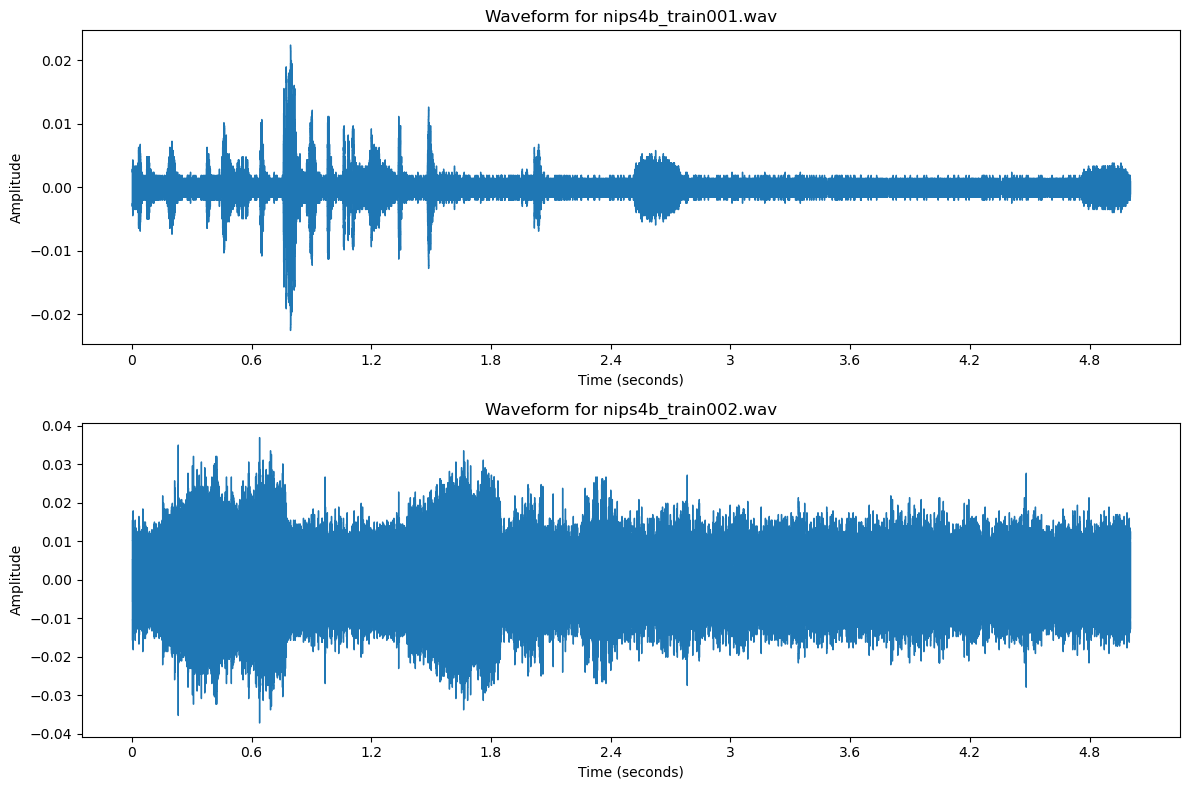

In [8]:
import librosa.display
import numpy as np

# Load and plot audio waveforms for the provided training WAV files
train_audio_files = ['data/train/nips4b_train001.wav', 'data/train/nips4b_train002.wav']

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

for i, audio_file in enumerate(train_audio_files):
    y, sr = librosa.load(audio_file, sr=None)
    librosa.display.waveshow(y, sr=sr, ax=axs[i])
    axs[i].set_title(f'Waveform for {audio_file.split("/")[-1]}')
    axs[i].set_xlabel('Time (seconds)')
    axs[i].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


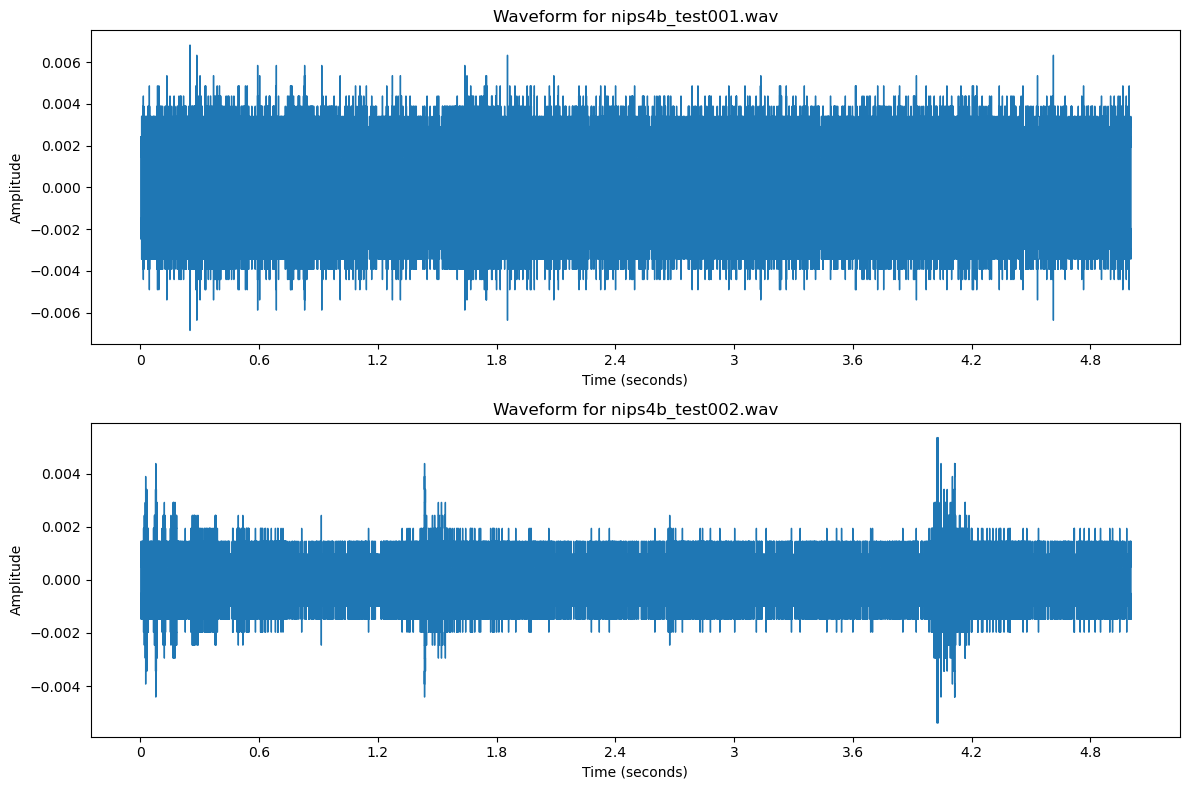

In [9]:
# Load and plot audio waveforms for the provided test WAV files
test_audio_files = ['data/test/nips4b_test001.wav', 'data/test/nips4b_test002.wav']

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

for i, audio_file in enumerate(test_audio_files):
    y, sr = librosa.load(audio_file, sr=None)
    librosa.display.waveshow(y, sr=sr, ax=axs[i])
    axs[i].set_title(f'Waveform for {audio_file.split("/")[-1]}')
    axs[i].set_xlabel('Time (seconds)')
    axs[i].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [10]:
import IPython.display as ipd

# Paths to the audio files
train_audio_path = "data/train/nips4b_train001.wav"
test_audio_path = "data/test/nips4b_test001.wav"

# Play the audio files
train_audio = ipd.Audio(train_audio_path)
test_audio = ipd.Audio(test_audio_path)

train_audio

In [11]:
test_audio